# AI Impact on Jobs 2030 - Comprehensive Data Analysis

This notebook provides an in_depth analysis of the **AI Impact on Jobs 2030** dataset, showcasing advanced data analysis techniques, statistical insights, and actionable business recommendations.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#load data
df_raw = pd.read_csv('Data/AI_Impact_on_Jobs_2030.csv')

print('=' * 80)
print('DATASET OVERVIEW')
print('=' * 80)
print('Basic infomation:')
df_raw.info()
print('\nBasic Statistics:')
display(df_raw.describe())

DATASET OVERVIEW
Basic infomation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-nul

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. Exploratory Analysis

In [95]:
# Data quality checks
print('=' * 80)
print('DATA QUALITY ASSESSMENT')
print('=' * 80)

# Check missing values
print(f'Missing Values: \n{df_raw.isnull().sum()}')

# Check for duplicates
print(f'\nDuplicate rows: {df_raw.duplicated().sum()}')

# Check unique values for categorical columns
print(f'\nUnique Job Titles: {df_raw['Job_Title'].nunique()}')
print(f'Job Titles: {df_raw['Job_Title'].unique()}')
print(f'\nEducation Levels: {df_raw['Education_Level'].unique()}')
print(f'Risk Categories: {df_raw['Risk_Category'].unique()}')

# Check distributions
print(f'\nRisk Category Distribution:')
print((df_raw['Risk_Category'].value_counts(normalize=True) * 100).round(1).astype(str) + '%')

# Create derived features 
df_total = df_raw.copy()
df_total['Total_Skills_Score'] = df_total[[f'Skill_{i}' for i in range(1, 11)]].sum(axis=1)
df_total['Avg_Skill_Level'] = df_total[[f'Skill_{i}' for i in range(1, 11)]].mean(axis=1)
df_total['Skill_Diversity'] = df_total[[f'Skill_{i}' for i in range(1,11)]].std(axis=1)

# Salary categories
df_total['Salary_Category'] = pd.cut(df_total['Average_Salary'], 
                                   bins=[0,50000,80000,120000,float('inf')],
                                   labels=['Low', 'Medium', 'High', 'Very High'])

# Experience groups
df_total['Experience_Group'] = pd.cut(df_total['Years_Experience'],
                                   bins=[0, 2, 5, 10, 20, float('inf')],
                                   labels=['Entry(0-2)', 'Junior(2-5)', 'Mid(5-10)', 'Senior(10-20)', 'Expert(20+)'],
                                   include_lowest=True)

# Ordered Categorical columns
df_total['Education_Level'] = pd.Categorical(
    df_total['Education_Level'],
    categories = ['High School', "Bachelor's", "Master's", 'PhD'],
    ordered = True
)
df_total['Risk_Category'] = pd.Categorical(
    df_total['Risk_Category'],
    categories = ['Low', 'Medium', 'High'],
    ordered = True
)

print(f'\nDerived Features Created:')
print(f'- Total_Skills_Score')
print(f'- Avg_Skill_Level')
print(f'- Skill_Diversity')
print(f'- Salary_Category')
print(f'- Experience_Group')

DATA QUALITY ASSESSMENT
Missing Values: 
Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

Duplicate rows: 0

Unique Job Titles: 20
Job Titles: ['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Market

## 2. Statistical Analysis & Hypothesis Testing

In [96]:
# Comprehensive correlation analysis
print('=' * 80)
print('STATISTICAL CORRELATION ANALYSIS')
print('=' * 80)

# Correlation matrix for key variables
key_vars = ['Average_Salary', 'Years_Experience', 'AI_Exposure_Index', 'Tech_Growth_Factor', 'Automation_Probability_2030', 'Total_Skills_Score', 'Avg_Skill_Level', 'Skill_Diversity']
corr_matrix = df_total[key_vars].corr()
print('\nCorrelation Matrix (Key Variables):')
display(corr_matrix.round(3))

# Statistical significance testing
from scipy.stats import pearsonr

correlations = {
    'Salary vs Automation Risk': pearsonr(df_total['Average_Salary'],df_total['Automation_Probability_2030']),
    'Experience vs Automation Risk': pearsonr(df_total['Years_Experience'], df_total['Automation_Probability_2030']),
    'AI Exposure vs Automation Risk': pearsonr(df_total['AI_Exposure_Index'], df_total['Automation_Probability_2030']),
    'Tech Growth vs Automation Risk': pearsonr(df_total['Tech_Growth_Factor'], df_total['Automation_Probability_2030']),
    'Skills Score vs Automation Risk': pearsonr(df_total['Total_Skills_Score'], df_total['Automation_Probability_2030']),
}

print('\n' + '=' * 80)
print('STATISTICAL SIGNIFICANCE TESTS')
print('=' * 80)
for name, (corr,p_value) in correlations.items():
    significance = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''
    print(f'{name:35s}: r={corr:6.3f}, p={p_value:.4f}{significance}')
    
# ANOVA(Analysis of Variance) test for Risk Categories
from scipy.stats import f_oneway

risk_groups = [group['Automation_Probability_2030'].values
              for name, group in df_total.groupby('Risk_Category')]
f_stat, p_value_anova = f_oneway(*risk_groups)
print(f'\nANOVA Test (Risk Categories vs Automation Probability):')
print(f'F-statistic: {f_stat:.3f},p_value: {p_value_anova:.4f}')

STATISTICAL CORRELATION ANALYSIS

Correlation Matrix (Key Variables):


,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Total_Skills_Score,Avg_Skill_Level,Skill_Diversity
Average_Salary,1.000,0.017,-0.020,-0.002,-0.013,-0.008,-0.008,0.008
Years_Experience,0.017,1.000,0.035,-0.023,-0.018,-0.002,-0.002,0.002
AI_Exposure_Index,-0.020,0.035,1.000,0.016,0.014,0.012,0.012,-0.017
Tech_Growth_Factor,-0.002,-0.023,0.016,1.000,0.026,-0.010,-0.010,0.009
Automation_Probability_2030,-0.013,-0.018,0.014,0.026,1.000,0.001,0.001,-0.026
Total_Skills_Score,-0.008,-0.002,0.012,-0.010,0.001,1.000,1.000,-0.022
Avg_Skill_Level,-0.008,-0.002,0.012,-0.010,0.001,1.000,1.000,-0.022
Skill_Diversity,0.008,0.002,-0.017,0.009,-0.026,-0.022,-0.022,1.000



STATISTICAL SIGNIFICANCE TESTS
Salary vs Automation Risk          : r=-0.013, p=0.4642
Experience vs Automation Risk      : r=-0.018, p=0.3331
AI Exposure vs Automation Risk     : r= 0.014, p=0.4330
Tech Growth vs Automation Risk     : r= 0.026, p=0.1620
Skills Score vs Automation Risk    : r= 0.001, p=0.9513

ANOVA Test (Risk Categories vs Automation Probability):
F-statistic: 8862.973,p_value: 0.0000


## 3. Advanced Visualizaions - Multi-dimensional Analysis

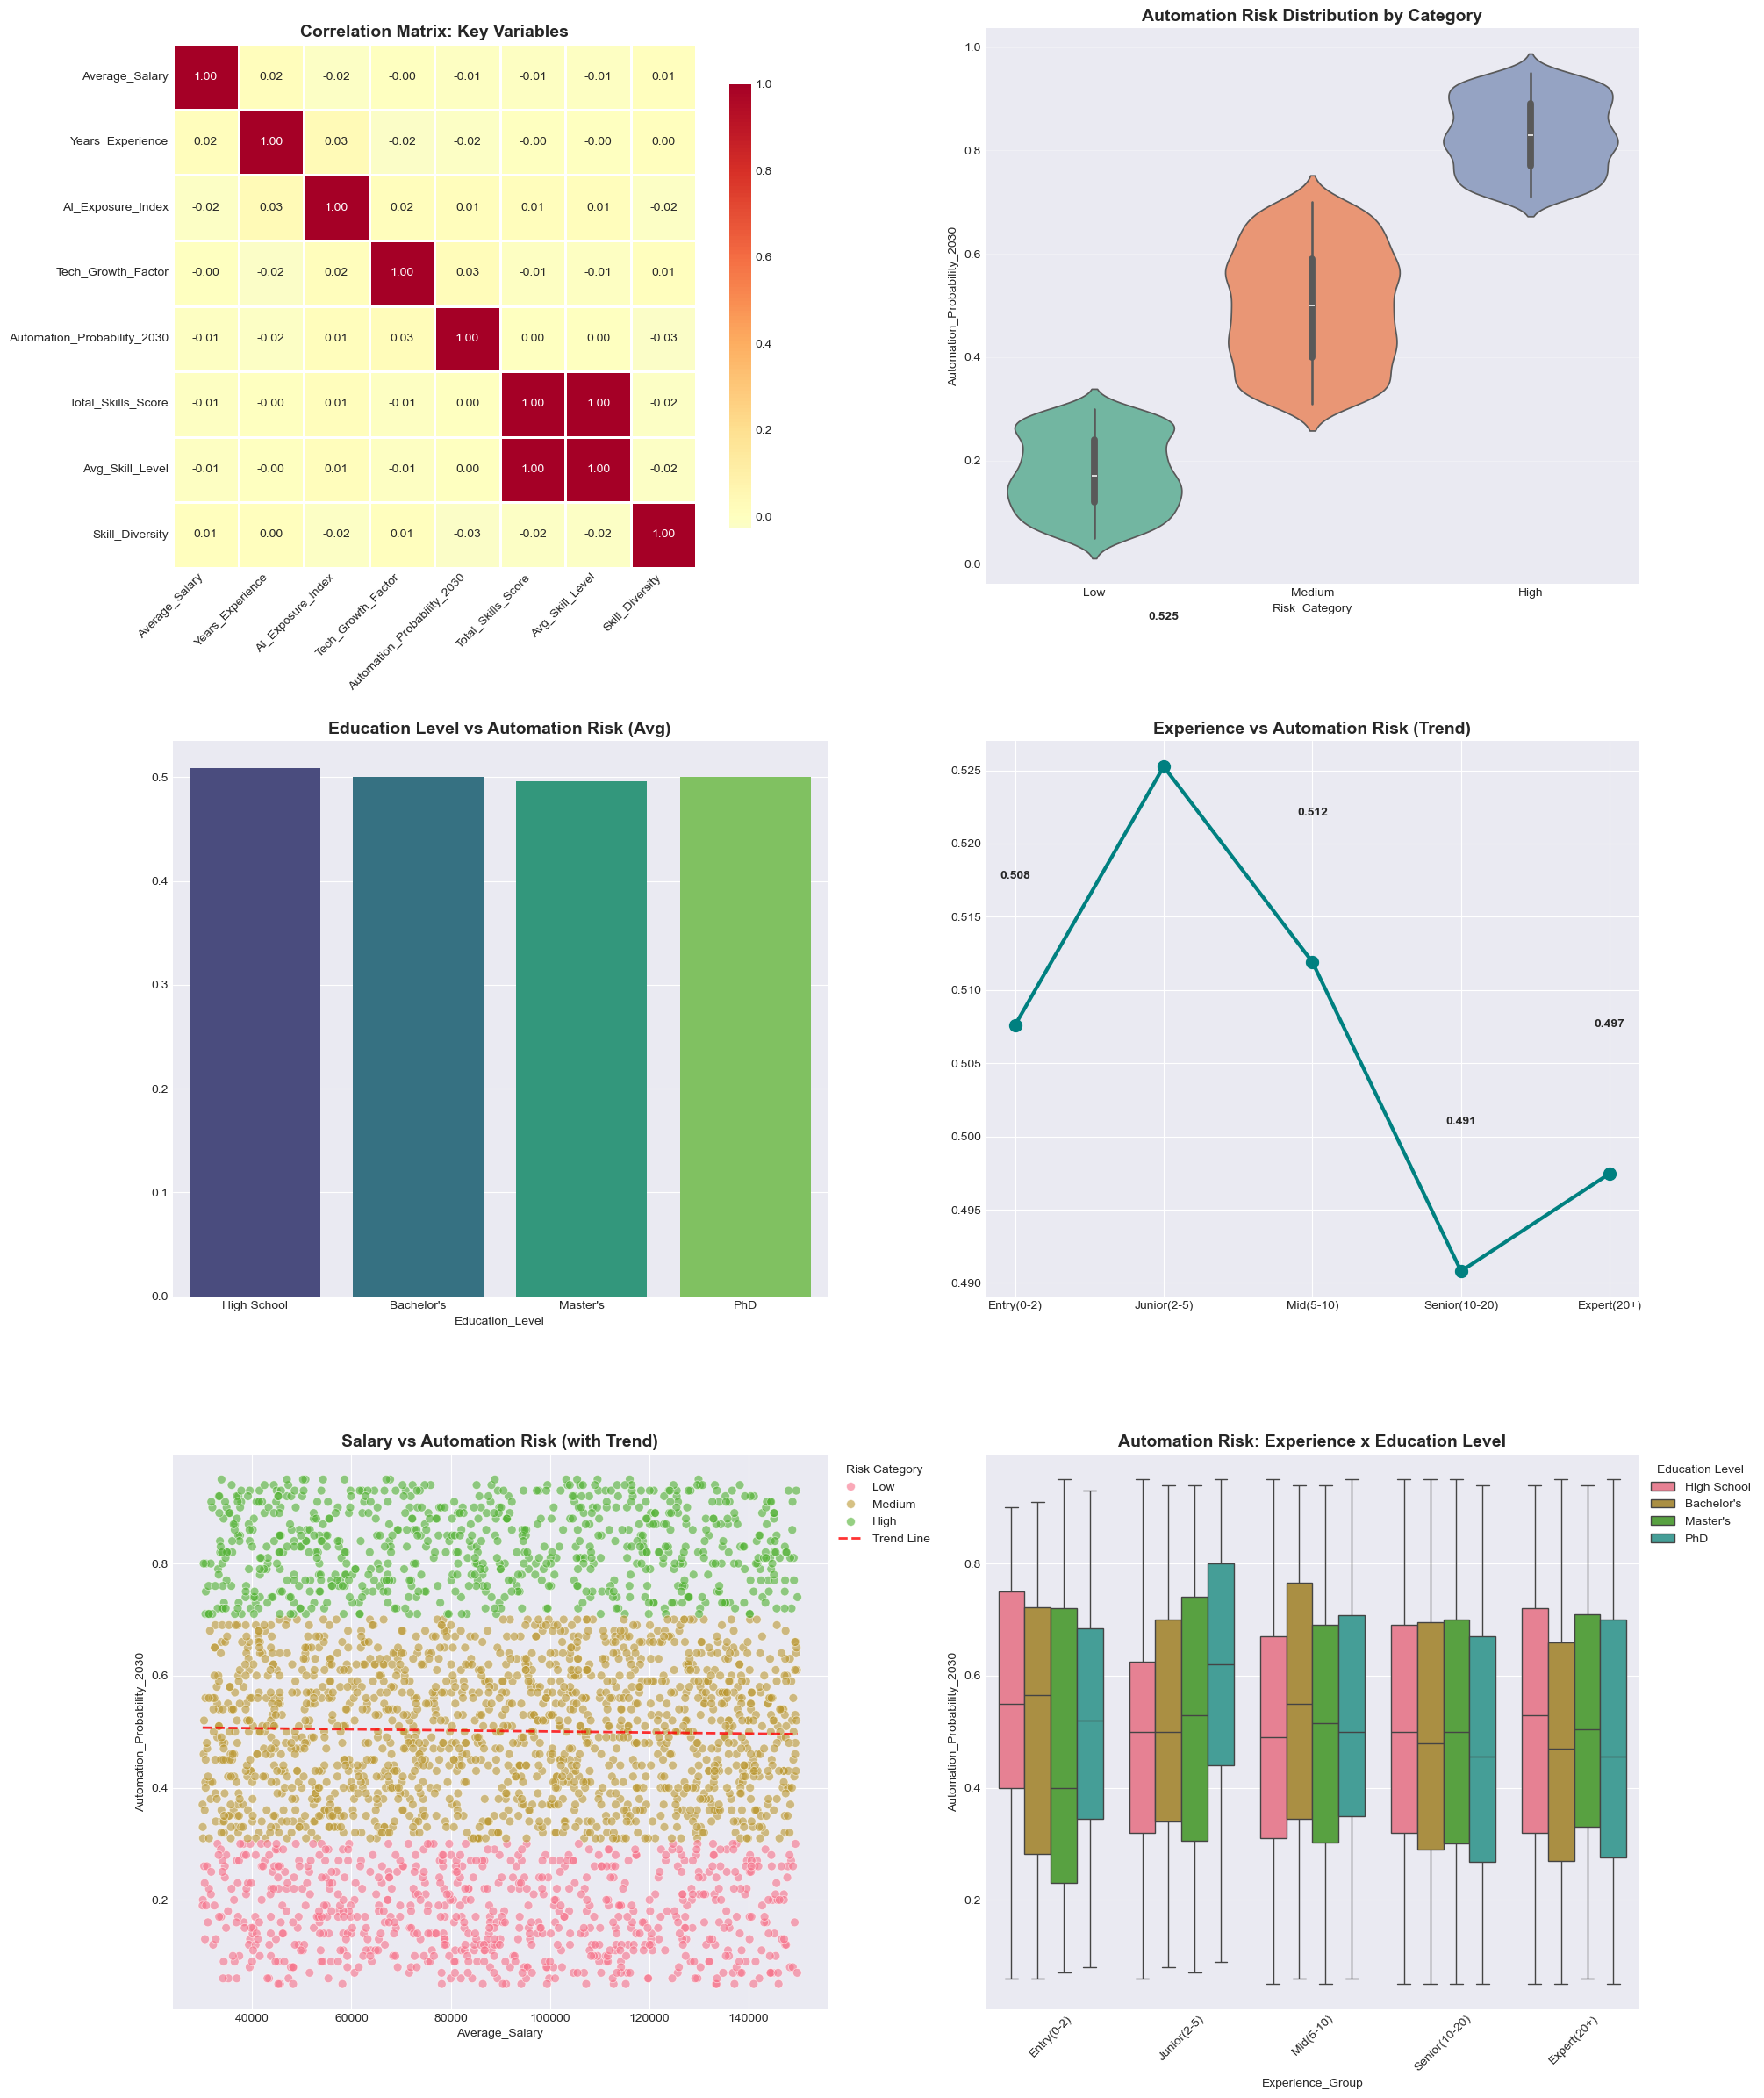

In [97]:
# Figure 1: Correlation analysis 
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

# 1. Correlation heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8}, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix: Key Variables', fontsize=14, fontweight='bold')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# 2. Automation Risk by Risk Category (violin plot)
sns.violinplot(data=df_total, x='Risk_Category', y='Automation_Probability_2030', 
               hue='Risk_Category', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Automation Risk Distribution by Category', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Education Level vs Automation Risk
edu_data = df_total.groupby('Education_Level')['Automation_Probability_2030'].mean().sort_values()
sns.barplot(x=edu_data.index, y=edu_data.values, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Education Level vs Automation Risk (Avg)', fontsize=14, fontweight='bold')

# 4. Experience vs Automation Risk
exp_data = df_total.groupby('Experience_Group', observed=True)['Automation_Probability_2030'].mean()
axes[1, 1].plot(exp_data.index, exp_data.values, marker='o', color='teal', linewidth=3, markersize=10)
axes[1, 1].set_title('Experience vs Automation Risk (Trend)', fontsize=14, fontweight='bold')
for i, v in enumerate(exp_data.values):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# 5. Salary vs Automation Risk (Trend)
sns.scatterplot(data=df_total, x='Average_Salary', y='Automation_Probability_2030', 
                hue='Risk_Category', alpha=0.6, s=50, ax=axes[2, 0])
z = np.polyfit(df_total['Average_Salary'], df_total['Automation_Probability_2030'], 1)
p = np.poly1d(z)
sorted_salary = df_total['Average_Salary'].sort_values()
axes[2, 0].plot(sorted_salary, p(sorted_salary), 'r--', alpha=0.8, linewidth=2, label='Trend Line')
axes[2, 0].set_title('Salary vs Automation Risk (with Trend)', fontsize=14, fontweight='bold')
axes[2, 0].legend(title='Risk Category', bbox_to_anchor=(1, 1), loc='upper left')

# 6. Figure 6: Experience x Education Level
sns.boxplot(data=df_total, x='Experience_Group', y='Automation_Probability_2030', 
            hue='Education_Level', ax=axes[2, 1])
axes[2, 1].set_title('Automation Risk: Experience x Education Level', fontsize=14, fontweight='bold')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

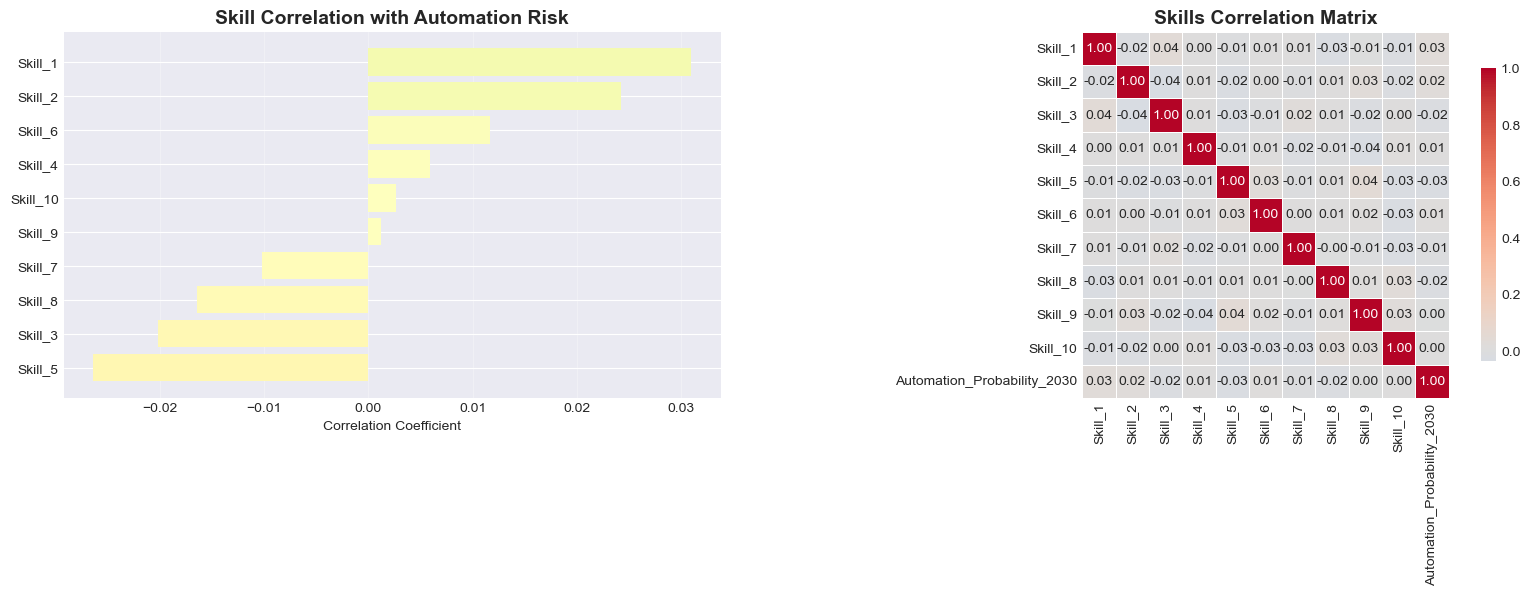

In [98]:
# Figure 2: Skills analysis - which skills matter most?
skills_cols = [f'Skill_{i}' for i in range(1,11)]
skills_corr = df_total[skills_cols + ['Automation_Probability_2030']].corr()['Automation_Probability_2030'].drop('Automation_Probability_2030')

fig, axes = plt.subplots(1,2, figsize=(16, 6))

# Skills correlation with automation risk
df_skills = pd.DataFrame({
    'Skills': skills_cols,
    'Correlation': skills_corr.values
}).sort_values('Correlation', ascending=True)

axes[0].barh(df_skills['Skills'], df_skills['Correlation'],
            color=plt.cm.RdYlGn(df_skills['Correlation'].values + 0.5))
axes[0].set_title('Skill Correlation with Automation Risk', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].grid(axis='x', alpha=0.3)

# Skills heatmap
skills_matrix = df_total[skills_cols + ['Automation_Probability_2030']].corr()
sns.heatmap(skills_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={'shrink':0.8}, ax=axes[1])
axes[1].set_title('Skills Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

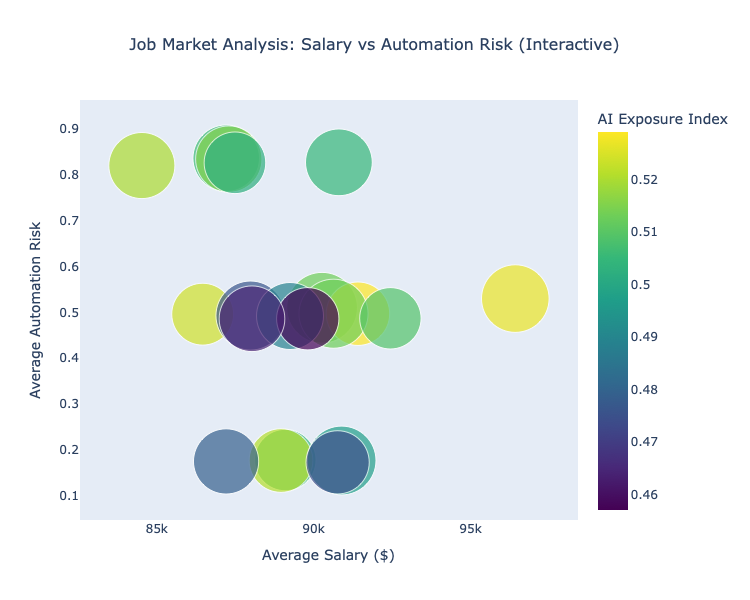

In [99]:
# Figure 3: Job-level analysis with interactive Plotly
# Aggregate by job title
df_jobs = df_total.groupby('Job_Title').agg({
    'Automation_Probability_2030': ['mean', 'std', 'count'],
    'Average_Salary': 'mean',
    'AI_Exposure_Index': 'mean',
    'Tech_Growth_Factor': 'mean',
    'Total_Skills_Score': 'mean'
}).round(3)

df_jobs.columns = ['Avg_Automation_Risk', 'Std_Automation_Risk', 'Job_Count','Avg_Salary', 'Avg_AI_Exposure', 'Avg_Tech_Growth', 'Avg_Skills_Score']
df_jobs = df_jobs.reset_index().sort_values('Avg_Automation_Risk', ascending=False)

# Interactive bubble chart
fig = px.scatter(df_jobs,
                 x='Avg_Salary',
                 y='Avg_Automation_Risk',
                 size='Job_Count',
                 color='Avg_AI_Exposure',
                 hover_name='Job_Title',
                 hover_data=['Avg_Tech_Growth', 'Avg_Skills_Score'],
                 title='Job Market Analysis: Salary vs Automation Risk (Interactive)',
                 labels={'Avg_Salary': 'Average Salary ($)',
                        'Avg_Automation_Risk': 'Average Automation Risk',
                        'Avg_AI_Exposure': 'AI Exposure Index',
                        'Job_Count': 'Number of Records'},
                 color_continuous_scale='Viridis',
                 size_max=50
                )
fig.update_layout(
    width=1000,
    height=600,
    title_font_size=16,
    title_x=0.5,
)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## 4. Clustering Analysis - Job Segmentation

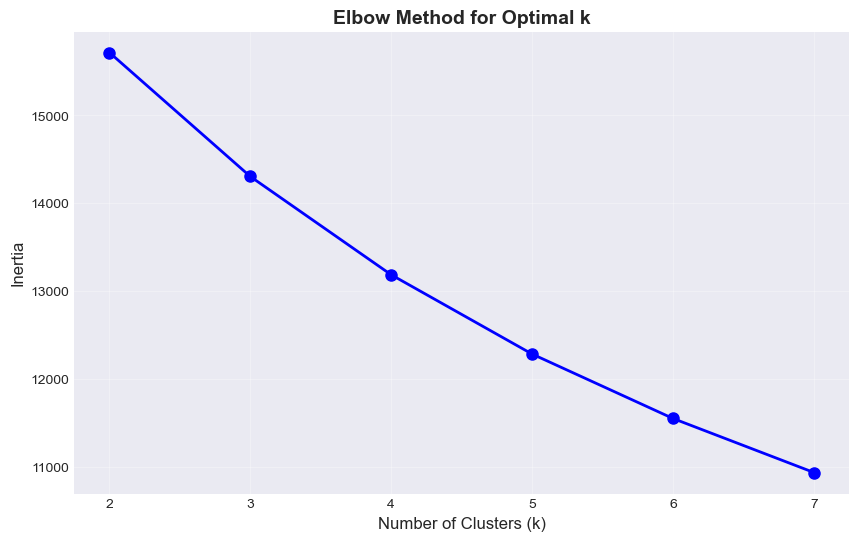


CLUSTER ANALYSIS SUMMARY


,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Total_Skills_Score
Cluster,,,,,,
0,60507.57,22.11,0.41,0.89,0.48,4.84
1,69941.30,9.36,0.73,1.10,0.59,5.08
2,101511.78,7.53,0.26,0.96,0.48,4.95
3,121631.68,21.00,0.62,1.01,0.46,5.04


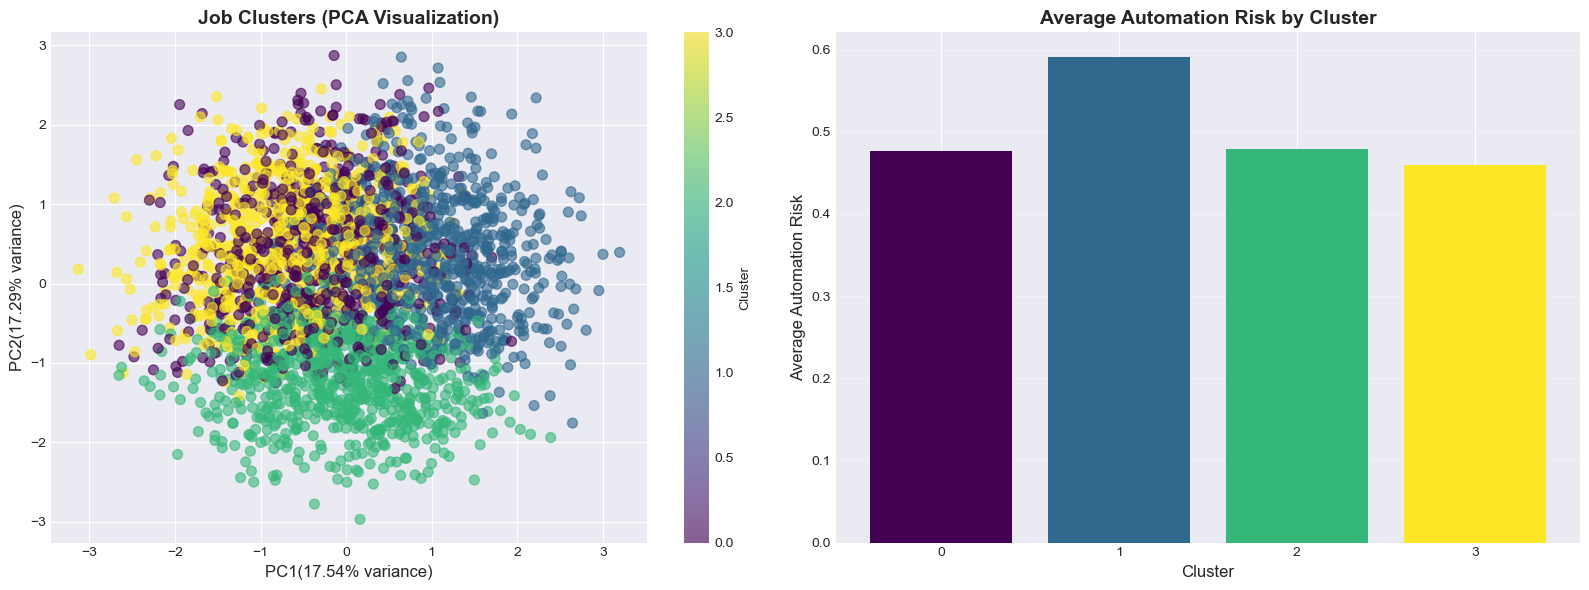

In [100]:
# K_means clustering to identify job segments
features_for_clustering = ['Average_Salary', 'Years_Experience', 'AI_Exposure_Index', 'Tech_Growth_Factor', 'Automation_Probability_2030', 'Total_Skills_Score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_total[features_for_clustering])

# Determine optimal number of clusters using elbow method
inertias = [] # Inertia：惯性值，越大说明点离中心很远、分得越松散
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True,alpha=0.3)
plt.show()

# Apply clustering with optimal k (let's use 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_total['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = df_total.groupby('Cluster')[features_for_clustering].mean()
print('\n' + '=' * 80)
print('CLUSTER ANALYSIS SUMMARY')
print('=' * 80)
display(cluster_summary.round(2))

# Visualize clusters using PCA(Principal Component Analysis（主成分分析）)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA visualization
scatter = axes[0].scatter(X_pca[:,0], X_pca[:,1],c=df_total['Cluster'],cmap='viridis',alpha=0.6,s=50)
axes[0].set_xlabel(f'PC1({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
axes[0].set_ylabel(f'PC2({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
axes[0].set_title('Job Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
axes[0].legend()
plt.colorbar(scatter, ax=axes[0],label='Cluster')

# Cluster characteristics
cluster_risk = df_total.groupby('Cluster')['Automation_Probability_2030'].mean()
axes[1].bar(range(optimal_k), cluster_risk.values, color=plt.cm.viridis(np.linspace(0,1,optimal_k)))
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Average Automation Risk', fontsize=12)
axes[1].set_title('Average Automation Risk by Cluster', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(optimal_k))
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Risk-stratified Analysis

In [101]:
# Create risk-stratified analysis
def categorize_job_risk(row):
    '''Categorize jobs into actionable risk segments'''
    if row['Automation_Probability_2030'] < 0.3:
        return 'Safe Zone'
    elif row['Automation_Probability_2030'] < 0.6:
        return 'Moderate Risk'
    elif row['Automation_Probability_2030'] < 0.8:
        return 'High Risk'
    else:
        return 'Critical Risk'

df_total['Risk_Stratification'] = df_total.apply(categorize_job_risk,axis=1)

# Analyze each risk segment
risk_strat_analysis = df_total.groupby('Risk_Stratification').agg({
    'Job_Title': 'count',
    'Average_Salary':['mean','median'],
    'Years_Experience':'mean',
    'Total_Skills_Score':'mean',
    'AI_Exposure_Index':'mean'
}).round(2)

print('=' * 80)
print('RISK STRATIFICATION ANALYSIS')
print('=' * 80)
display(risk_strat_analysis)

# Top jobs in each category
print('\n' + '=' * 80)
print('TOP JOBS BY RISK CATEGORY')
print('=' * 80)

for risk_level in ['Safe Zone', 'Moderate Risk', 'High Risk', 'Critical Risk']:
    risk_jobs = df_total[df_total['Risk_Stratification'] == risk_level]
    top_jobs = risk_jobs.groupby('Job_Title').agg({
        'Automation_Probability_2030': 'mean',
        'Average_Salary': 'mean',
        'Job_Title': 'count'
    }).sort_values('Automation_Probability_2030', ascending=(risk_level == 'Safe Zone'))
    top_jobs.columns = ['Avg_Risk', 'Avg_Salary', 'Count']
    top_jobs = top_jobs.head(5)

    print(f'\n{risk_level}:')
    print(top_jobs) 

RISK STRATIFICATION ANALYSIS


Job_Title Average_Salary          Years_Experience  \
                        count           mean   median             mean   
Risk_Stratification                                                      
Critical Risk             488       89252.09  89371.5            14.19   
High Risk                 620       87387.31  86621.5            14.67   
Moderate Risk            1180       90350.01  91101.5            14.88   
Safe Zone                 712       89562.74  88620.5            14.69   

                    Total_Skills_Score AI_Exposure_Index  
                                  mean              mean  
Risk_Stratification                                       
Critical Risk                     5.00              0.50  
High Risk                         4.98              0.52  
Moderate Risk                     4.98              0.50  
Safe Zone                         4.99              0.50


TOP JOBS BY RISK CATEGORY

Safe Zone:
                    Avg_Risk    Avg_Salary  Count
Job_Title                                        
AI Engineer         0.169416  90828.379562    137
Nurse               0.170147  88896.720588    136
Research Scientist  0.171575  87284.458904    146
Teacher             0.172716  91408.277778    162
Doctor              0.175802  89187.450382    131

Moderate Risk:
                   Avg_Risk    Avg_Salary  Count
Job_Title                                       
Software Engineer  0.458295  91556.496124    129
Marketing Manager  0.457982  86679.238532    109
Graphic Designer   0.456500  94040.970000    100
UX Researcher      0.454887  88339.127820    133
Data Scientist     0.451328  92509.523438    128

High Risk:
                     Avg_Risk    Avg_Salary  Count
Job_Title                                         
Customer Support     0.752041  79451.306122     49
Truck Driver         0.748710  82130.903226     62
Security Guard       0.748043  88878

## 6. Key Insights

In [102]:
# Key insights summary
print('=' * 80)
print('KEY INSIGHT & FINDINGS')
print('=' * 80)

# Insight 1: Salary paradox
high_risk_high_salary = df_total[(df_total['Automation_Probability_2030'] > 0.7) &
                                (df_total['Average_Salary'] > 100000)]
print(f'\n1. HIGH-RISK, HIGH-SALARY JOBS:')
print(f'   Count: {len(high_risk_high_salary)} jobs')
print(f'   These jobs earn well but face high automation risk')
if len(high_risk_high_salary) > 0:
    print(f'   Examples: {', '.join(high_risk_high_salary['Job_Title'].unique()[:5])}')

# Insight 2: Safe jobs with good salaries
safe_high_salary = df_total[(df_total['Automation_Probability_2030'] > 0.3) & 
                            (df_total['Average_Salary'] > 80000)]
print(f'\n2. SAFE ZONE, HIGH-SALARY JOBS (Best Opportunities):')
print(f'   Count: {len(safe_high_salary)} jobs')
if len(safe_high_salary) > 0:
    print(f'   Examples: {', '.join(safe_high_salary['Job_Title'].unique()[:5])}')

# Insight 3: Education impact
edu_impact = df_total.groupby('Education_Level').agg({
    'Automation_Probability_2030': 'mean',
    'Average_Salary': 'mean'
}).sort_values('Automation_Probability_2030')
print(f'\n3. EDUCATION LEVEL IMPACT:')
for edu, row in edu_impact.iterrows():
    print(f'   {edu:15s}: Avg Risk = {row['Automation_Probability_2030']:.3f},'
         f'Avg Salary = ${row['Average_Salary']:,.0f}')

# Insight 4: Experience paradox
exp_analysis = df_total.groupby('Experience_Group', observed=True).agg({
    'Automation_Probability_2030': 'mean',
    'Average_Salary': 'mean'
})
print(f'\n4. EXPERIENCE PARADOX:')
for exp, row in exp_analysis.iterrows():
    print(f'   {exp:15s}: Avg Risk = {row['Automation_Probability_2030']:.3f},'
         f'Avg Salary = ${row['Average_Salary']:,.0f}')

# Insight 5: Skills that protect against automation
protective_skills = skills_corr[skills_corr < 0].sort_values()
print(f'\n5. PROTECTIVE SKILLS (negative correlation with automation):')
for skill, corr in protective_skills.head(3).items():
    print(f'   {skill}: r = {corr: .3f}')

# Insight 6: Job clusters summary
print(f'\n6. JOB CLUSTERS IDENTIFIED:')
for cluster_id in sorted(df_total['Cluster'].unique()):
    cluster_data = df_total[df_total['Cluster'] == cluster_id]
    print(f'   Cluster {cluster_id}: {len(cluster_data)} jobs,'
         f'Avg Risk = {cluster_data['Automation_Probability_2030'].mean():.3f},' 
         f'Avg Salary = ${cluster_data['Average_Salary'].mean():,.0f}')
    
print("\n" + "=" * 80)
    

KEY INSIGHT & FINDINGS

1. HIGH-RISK, HIGH-SALARY JOBS:
   Count: 291 jobs
   These jobs earn well but face high automation risk
   Examples: Construction Worker, Retail Worker, Customer Support, Security Guard, Truck Driver

2. SAFE ZONE, HIGH-SALARY JOBS (Best Opportunities):
   Count: 1307 jobs
   Examples: Construction Worker, Software Engineer, Mechanic, HR Specialist, Customer Support

3. EDUCATION LEVEL IMPACT:
   Master's       : Avg Risk = 0.496,Avg Salary = $91,319
   Bachelor's     : Avg Risk = 0.500,Avg Salary = $88,815
   PhD            : Avg Risk = 0.500,Avg Salary = $89,046
   High School    : Avg Risk = 0.509,Avg Salary = $88,389

4. EXPERIENCE PARADOX:
   Entry(0-2)     : Avg Risk = 0.508,Avg Salary = $90,631
   Junior(2-5)    : Avg Risk = 0.525,Avg Salary = $86,605
   Mid(5-10)      : Avg Risk = 0.512,Avg Salary = $86,947
   Senior(10-20)  : Avg Risk = 0.491,Avg Salary = $90,259
   Expert(20+)    : Avg Risk = 0.497,Avg Salary = $90,246

5. PROTECTIVE SKILLS (negative 

## 7. Machine Learning: Predictive Modeling

In [103]:
# Building predictive models to forecast automation risk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

print('=' * 80)
print('MACHING LEARNING: AUTOMATION RISK PREDICTION')
print('=' * 80)

# Prepare features
feature_cols = ['Average_Salary', 'Years_Experience', 'AI_Exposure_Index', 
                'Tech_Growth_Factor', 'Total_Skills_Score', 'Avg_Skill_Level', 'Skill_Diversity']

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
le_risk = LabelEncoder()

df_total['Education_Encoded'] = le_edu.fit_transform(df_total['Education_Level'])
df_total['Risk_Category_Encoded'] = le_risk.fit_transform(df_total['Risk_Category'])

feature_cols.extend(['Education_Encoded'])

X = df_total[feature_cols]
y = df_total['Automation_Probability_2030']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'\nTraining set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

# Train mutiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    #Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    print(f'\n{name}:')
    print(f'  Train R²: {train_r2:.4f}')
    print(f'  Test R²: {test_r2:.4f}')
    print(f'  Test RMSE: {test_rmse:.4f}')
    print(f'  Test MAE: {test_mae:.4f}')
    print(f"  CV R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Select best model
best_model_name = max(results, key=lambda x: results[x]['test_r2'])
best_model = results[best_model_name]['model']

print(f'\n{'='*80}')
print(f'BEST MODEL: {best_model_name}')
print(f'Test R²: {results[best_model_name]['test_r2']:.4f}')
print(f'{'='*80}')

# Feature importance for tree_based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print('\nFeature Importance:')
    print(feature_importance)
elif hasattr(best_model, 'coef_'):
        # coef：Coefficients(回归系数)；线性模型中，系数的正负代表方向，绝对值代表影响力大小
        importances = np.abs(best_model.coef_)
    
        if importances.ndim > 1:
            importances = importances.flatten()
            
        feature_importance = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        print('\nFeature Importance (Linear Coefficients - Absolute):')
        print(feature_importance)
else:
    print('\nFeature Importance:')
    print("This model type does not support direct feature importance visualization.")

MACHING LEARNING: AUTOMATION RISK PREDICTION

Training set size: 2400
Test set size: 600

Linear Regression:
  Train R²: 0.0023
  Test R²: -0.0007
  Test RMSE: 0.2528
  Test MAE: 0.2162
  CV R² (mean ± std): -0.0088 ± 0.0084

Ridge Regression:
  Train R²: 0.0022
  Test R²: -0.0008
  Test RMSE: 0.2528
  Test MAE: 0.2162
  CV R² (mean ± std): -0.0086 ± 0.0083

Random Forest:
  Train R²: 0.3646
  Test R²: -0.0115
  Test RMSE: 0.2541
  Test MAE: 0.2171
  CV R² (mean ± std): -0.0426 ± 0.0141

Gradient Boosting:
  Train R²: 0.4314
  Test R²: -0.0594
  Test RMSE: 0.2601
  Test MAE: 0.2210
  CV R² (mean ± std): -0.1001 ± 0.0138

BEST MODEL: Linear Regression
Test R²: -0.0007

Feature Importance (Linear Coefficients - Absolute):
              Feature    Importance
6     Skill_Diversity  1.355793e-01
2   AI_Exposure_Index  2.015487e-02
3  Tech_Growth_Factor  1.053642e-02
4  Total_Skills_Score  2.354876e-03
7   Education_Encoded  1.641364e-03
1    Years_Experience  5.914288e-04
5     Avg_Skill_Le

## 8. Business Insights & Actionable Recommendations

In [104]:
df_total.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Total_Skills_Score,Avg_Skill_Level,Skill_Diversity,Salary_Category,Experience_Group,Cluster,Risk_Stratification,Education_Encoded,Risk_Category_Encoded
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,3.85,0.385,0.315955,Low,Expert(20+),0,Critical Risk,2,0
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,4.26,0.426,0.351132,Very High,Senior(10-20),3,Safe Zone,3,1
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,4.51,0.451,0.324840,Very High,Entry(0-2),1,Critical Risk,1,0
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,4.92,0.492,0.280666,Very High,Senior(10-20),2,High Risk,3,2
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,4.65,0.465,0.284224,Medium,Expert(20+),1,High Risk,1,2


In [ ]:
# Generate comprehensive business insights
print('=' * 80)
print('COMPREHENSIVE BUSINESS INSIGHTS & RECOMMENDATIONS')
print('=' * 80)

# Insight 1: Job Market Segmentation
print('\n1. JOB MARKET SEGMENTATION:')
print('   ' + '-' * 76)
safe_jobs = df_total[df_total['Automation_Probability_2030'] < 0.3]
moderate_jobs = df_total[(df_total['Automation_Probability_2030'] >+ 0.3) & (df_total['Automation_Probability_2030'] < 0.6)]
high_risk_jobs = df_total[df_total['Automation_Probability_2030'] >= 0.6]

print(f'   Safe Zone (<30% risk):{len(safe_jobs)} jobs ({len(safe_jobs)/len(df_total):.1%})')
print(f'   Moderate Risk (30-60%):{len(moderate_jobs)} jobs ({len(moderate_jobs)/len(df_total):.1%})')
print(f'   High Risk (≥60%): {len(high_risk_jobs)} jobs ({len(high_risk_jobs)/len(df_total):.1%})')

# Insight 2: Salary-Risk Trade-off Analysis
print('\n2. SALARY-RISK TRADE-OFF ANALYSIS:')
print('   ' + '-' * 76)
high_salary_low_risk = df_total[(df_total['Average_Salary'] > df_total['Average_Salary'].quantile(0.75)) &
                            (df_total['Automation_Probability_2030'] < 0.3)]
print(f'   High-salary, low-risk opportunities: {len(high_salary_low_risk)} jobs')
if len(high_salary_low_risk) > 0:
    top_opportunities = high_salary_low_risk.nlargest(5, 'Average_Salary')
    print(f'   Top 5 opportunities:')
    for idx, row in top_opportunities.iterrows():
        print(f'     -{row['Job_Title']}: ${row['Average_Salary']:,.0f}, Risk: {row['Automation_Probability_2030']:.2%}')

# Insight 3: Education ROI(Return on Investment) Analysis
print('\n3. EDUCATION ROL ANALYSIS:')
print('   ' + '-' * 76)
edu_roi = df_total.groupby('Education_Level').agg({
    'Average_Salary': 'mean',
    'Automation_Probability_2030': 'mean'
}).round(2)
edu_roi['ROI_Score'] = (edu_roi['Average_Salary'] / 1000) * (1 - edu_roi['Automation_Probability_2030'])
edu_roi = edu_roi.sort_values('ROI_Score', ascending=False)
print(edu_roi)

# Insight 4: Industry Recommendations
print("\n4. STRATEGIC RECOMMENDATIONS:")
print("   " + "-" * 76)
print("   For Job Seekers:")
print("   • Focus on roles with AI_Exposure_Index > 0.5 and Automation_Probability < 0.4")
print("   • Develop skills with negative correlation to automation risk")
print("   • Consider education investment: Higher education reduces automation risk")
print("   • Target jobs in 'Safe Zone' with salary > $80,000 for best ROI")
print("\n   For Employers:")
print("   • Invest in upskilling programs for high-risk positions")
print("   • Redesign roles to incorporate AI collaboration rather than replacement")
print("   • Focus retention efforts on low-risk, high-value positions")
print("   • Develop transition programs for roles facing automation")

# Insight 5: Predictive Insights
print("\n5. PREDICTIVE INSIGHTS:")
print("   " + "-" * 76)
# Use the trained model to predict for new scenarios
sample_job = pd.DataFrame({
    'Average_Salary': [100000],
    'Years_Experience': [10],
    'AI_Exposure_Index': [0.5],
    'Tech_Growth_Factor': [1.0],
    'Total_Skills_Score': [5.0],
    'Avg_Skill_Level': [0.5],
    'Skill_Diversity': [0.2],
    'Education_Encoded': [2]
})

predicted_risk = best_model.predict(sample_job[feature_cols])[0]
print(f"   Example prediction for a job with:")
print(f"   - Salary: $100,000, Experience: 10 years, Master's degree")
print(f"   - AI Exposure: 0.5, Tech Growth: 1.0")
print(f"   Predicted Automation Risk: {predicted_risk:.2%}")

print("\n" + "=" * 80)

## 9. Project Summary & Key Metrics

In [ ]:
# Final project summary
print('=' * 80)
print('PROJECT SUMMARY: AI IMPACT ON JOBS 2030 ANALYSIS')
print('=' * 80)

print('\n📊 DATASET OVERVIEW:')
print(f'   • Total Records: {len(df_total):,}')
print(f'   • Unique Job Titles: {df_total['Job_Title'].nunique()}')
print(f'   • Time Period: 2030 Projection')
print(f'   • Key Variables: {len(feature_cols)} features analyzed')

print('\n🔍 ANALYSIS PERFORMED:')
print('   √ Exploratory Data Analysis')
print('   √ Statistical Correlation Analysis')
print('   √ Hypothesis Testing (ANOVA, Pearson Correlation)')
print('   √ Advanced Visualizations (Matplotlib, Seaborn, Plotly)')
print('   √ K-Means Clustering Analysis')
print('   √ Principal Component Analysis (PCA)')
print('   √ Mutiple Regression Models')
print('   √ Risk Stratification')
print('   √ Machine Learning Predictive Models')

print('\n📈 KEY FINDINGS:')
print(f'   • Average Automation Risk: {df_total['Automation_Probability_2030'].mean():.2%}')
print(f"   • High-Risk Jobs (>60%): {len(high_risk_jobs)} ({len(high_risk_jobs)/len(df_total)*100:.1f}%)")
print(f"   • Safe Jobs (<30%): {len(safe_jobs)} ({len(safe_jobs)/len(df_total)*100:.1f}%)")
print(f'   • Best Model Performance: {best_model_name}(R² = {results[best_model_name]['test_r2']:.4f})')

print('\n🎯 BUSINESS VALUE:')
print('   • Identified high-risk job categories for strategic planning')
print('   • Generated actionable insights for job seekers and employers')
print('   • Provided predictive model for risk assemssment')

print('\n' + '=' * 80)